# Thank you for taking the time to review my work
In this project I will create bar plots of a store's actual PBF dollars on top of their budgeted PBF dollars and projected PBF dollars.

In [138]:
### Importing the necessary libraries to create the visualizations.

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [139]:
df = pd.read_csv("EarlsPBFRanking.csv")
print(df.head())
print(df.info())

             Store  Rank          CY $    CY %      Budget $   Budget %  \
0              NaN   NaN  3,384,156.04  20.21%    922,218.93      7.25%   
1      16th Avenue   1.0     67,531.48  20.05%      6,927.03      3.59%   
2     170th Street   2.0     59,886.76  19.24%   (20,255.11)   (14.79)%   
3    Albert Street   3.0     71,091.23  24.98%     48,876.42     16.58%   
4  Ambleside Beach   4.0    128,036.20  25.01%     83,615.24     17.57%   

          Var $   Var %          PY $    PY %       $ Change % Change  
0  2,461,937.11  12.96%  4,347,675.50  17.25%   (963,519.46)    2.96%  
1     60,604.45  16.45%     18,197.65   9.24%      49,333.83   10.81%  
2     80,141.87  34.03%     53,283.30  14.67%       6,603.46    4.56%  
3     22,214.81   8.40%     68,835.21  16.26%       2,256.02    8.72%  
4     44,420.96   7.44%     92,128.82  16.24%      35,907.38    8.77%  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 12 columns):
 #   Column   

### Because almost all of the numeric columns are saved as object types we will convert them to the float type and tidy them in preparation for data visualization

In [140]:
### Replacing some of the string formatting so that the values can be understood as float types.

df['CY $'] = df['CY $'].apply(lambda x: x.replace(",", ""))
df['CY $'] = df['CY $'].apply(lambda x: x.replace("(", "-"))
df['CY $'] = df['CY $'].apply(lambda x: x.replace(")", ""))
df['CY %'] = df['CY %'].apply(lambda x: x.replace("%", ""))
df['CY %'] = df['CY %'].apply(lambda x: x.replace("(", "-"))
df['CY %'] = df['CY %'].apply(lambda x: x.replace(")", ""))
df["Budget $"] = df["Budget $"].apply(lambda x: x.replace(",", ""))
df["Budget $"] = df["Budget $"].apply(lambda x: x.replace("(", "-"))
df["Budget $"] = df["Budget $"].apply(lambda x: x.replace(")", ""))
df["Budget %"] = df["Budget %"].apply(lambda x: x.replace("%", ""))
df["Budget %"] = df["Budget %"].apply(lambda x: x.replace("(", "-"))
df["Budget %"] = df["Budget %"].apply(lambda x: x.replace(")", ""))
df["PY $"] = df["PY $"].apply(lambda x: x.replace(",", ""))
df["PY $"] = df["PY $"].apply(lambda x: x.replace("(", "-"))
df["PY $"] = df["PY $"].apply(lambda x: x.replace(")", ""))
df["PY %"] = df["PY %"].apply(lambda x: x.replace("%", ""))
df["PY %"] = df["PY %"].apply(lambda x: x.replace("(", "-"))
df["PY %"] = df["PY %"].apply(lambda x: x.replace(")", ""))

In [141]:
## Converting the strings to floats (Could have made this step and the string formatting into a function)

df['CY $'] = df['CY $'].astype(float)
df['Budget $'] = df['Budget $'].astype(float)
df['PY $'] = df['PY $'].astype(float)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Store     52 non-null     object 
 1   Rank      52 non-null     float64
 2   CY $      53 non-null     float64
 3   CY %      53 non-null     object 
 4   Budget $  53 non-null     float64
 5   Budget %  53 non-null     object 
 6   Var $     53 non-null     object 
 7   Var %     53 non-null     object 
 8   PY $      53 non-null     float64
 9   PY %      53 non-null     object 
 10  $ Change  53 non-null     object 
 11  % Change  53 non-null     object 
dtypes: float64(4), object(8)
memory usage: 5.1+ KB
None


In [142]:
df1 = df
df1.drop('Rank', inplace=True, axis=1)
df1.drop('CY %', inplace=True, axis=1)
df1.drop('Budget %', inplace=True, axis=1)
df1.drop('Var $', inplace=True, axis=1)
df1.drop('Var %', inplace=True, axis=1)
df1.drop('PY %', inplace=True, axis=1)
df1.drop('$ Change', inplace=True, axis=1)
df1.drop('% Change', inplace=True, axis=1)

### Great now that we have just the columns that we are looking for we can begin to create separate data frames  for comparison between stores.

In [143]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Store     52 non-null     object 
 1   CY $      53 non-null     float64
 2   Budget $  53 non-null     float64
 3   PY $      53 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.8+ KB
None


In [145]:
## Melting the dataframe together so that we can use seaborn's hue parameter to show CY $, Budget $, and PY $ simultaneously
df1 = df1.melt("Store")

             Store        CY $   Budget $        PY $
0              NaN  3384156.04  922218.93  4347675.50
1      16th Avenue    67531.48    6927.03    18197.65
2     170th Street    59886.76  -20255.11    53283.30
3    Albert Street    71091.23   48876.42    68835.21
4  Ambleside Beach   128036.20   83615.24    92128.82


In [146]:
print(df1.head())

             Store variable       value
0              NaN     CY $  3384156.04
1      16th Avenue     CY $    67531.48
2     170th Street     CY $    59886.76
3    Albert Street     CY $    71091.23
4  Ambleside Beach     CY $   128036.20


In [180]:
graph_df = pd.DataFrame()
ave = df1[df1.Store == "16th Avenue"]
vic = df1[df1.Store == "Victoria"]
amble = df1[df1.Store == "Ambleside Beach"]

ave_vic = ave.append(vic)
ave_vic_amble = ave_vic.append(amble)
print(ave_vic_amble)

               Store  variable      value
1        16th Avenue      CY $   67531.48
54       16th Avenue  Budget $    6927.03
107      16th Avenue      PY $   18197.65
48          Victoria      CY $   95390.22
101         Victoria  Budget $   48070.66
154         Victoria      PY $   78469.64
4    Ambleside Beach      CY $  128036.20
57   Ambleside Beach  Budget $   83615.24
110  Ambleside Beach      PY $   92128.82


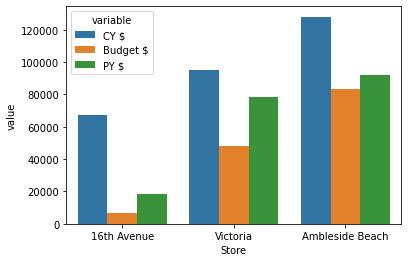

In [181]:
sns.barplot(data = ave_vic_amble, x='Store', y="value", hue='variable')
plt.show()